In [1]:
# Import required libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
# Option for decimal places
pd.options.display.float_format = '{:.2f}'.format

In [5]:
df = pd.read_csv('insurance_data.csv')

In [6]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.00,38.09,10.46,8.00,32.00,36.00,42.00,84.00
Commision,3000.00,14.53,25.48,0.00,0.00,4.63,17.23,210.21
Duration,3000.00,70.00,134.05,-1.00,11.00,26.50,63.00,4580.00
Sales,3000.00,60.25,70.73,0.00,20.00,33.00,69.00,539.00


In [2]:
import seaborn as sns

In [1]:
sns.pairplot(df, hue = 'Claimed' );

NameError: name 'sns' is not defined

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [11]:
df.isnull().sum().sum()

0

In [12]:
df.duplicated().sum()

139

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.drop(labels=df[df['Duration'] < 0].index, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2860 entries, 0 to 2999
Data columns (total 10 columns):
Age             2860 non-null int64
Agency_Code     2860 non-null object
Type            2860 non-null object
Claimed         2860 non-null object
Commision       2860 non-null float64
Channel         2860 non-null object
Duration        2860 non-null int64
Sales           2860 non-null float64
Product Name    2860 non-null object
Destination     2860 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 245.8+ KB


In [16]:
df[df['Duration'] > 3000]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


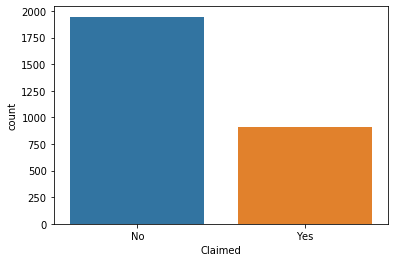

In [17]:
sns.countplot(df['Claimed']);

In [18]:
df['Claimed'].value_counts()

No     1946
Yes     914
Name: Claimed, dtype: int64

In [19]:
df['Claimed'].value_counts(normalize=True)*100

No    68.04
Yes   31.96
Name: Claimed, dtype: float64

In [20]:
for cols in df:
    if df[cols].dtype=='object':
        df[cols]=pd.Categorical(df[cols]).codes

In [21]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [22]:
# Model building Decision Tree

In [23]:
X = df.drop('Claimed', axis=1)
y = df['Claimed']

In [24]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [27]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [10, 13, 20],
    'min_samples_split': [30, 45, 60, 75]
}

dt_model = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=1,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [10, 13, 20],
                         'm

In [31]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 45}

In [32]:
best_grid_dt = grid_search.best_estimator_

In [33]:
ytrain_predict_dt = best_grid_dt.predict(X_train)
ytest_predict_dt = best_grid_dt.predict(X_test)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_train,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1343
           1       0.75      0.60      0.67       659

    accuracy                           0.80      2002
   macro avg       0.79      0.75      0.76      2002
weighted avg       0.80      0.80      0.80      2002



In [36]:
cart_train_acc = best_grid_dt.score(X_train, y_train)
probsDT_train = best_grid_dt.predict_proba(X_train)[:, 1]
DT_train_auc = roc_auc_score(y_train, probsDT_train)
print('Accuracy', cart_train_acc)
print('AUC: %.3f' % DT_train_auc)

Accuracy 0.8031968031968032
AUC: 0.852


In [37]:
cart_train_acc = best_grid_dt.score(X_train, y_train)
probsDT_train = best_grid_dt.predict_proba(X_train)[:, 1]
DT_train_auc = roc_auc_score(y_train, probsDT_train)
print('Accuracy', cart_train_acc)
print('AUC: %.3f' % DT_train_auc)
cart_metrics=classification_report(y_train,ytrain_predict_dt,output_dict=True)
data=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(data.loc["1"][0],2)
cart_train_recall=round(data.loc["1"][1],2)
cart_train_f1=round(data.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

Accuracy 0.8031968031968032
AUC: 0.852
cart_train_precision  0.75
cart_train_recall  0.6
cart_train_f1  0.67


In [38]:
print(classification_report(y_test,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       603
           1       0.64      0.51      0.57       255

    accuracy                           0.77       858
   macro avg       0.72      0.69      0.70       858
weighted avg       0.76      0.77      0.76       858



In [39]:
cart_test_acc = best_grid_dt.score(X_test, y_test)
probsDT_test = best_grid_dt.predict_proba(X_test)[:, 1]
DT_test_auc = roc_auc_score(y_test, probsDT_test)
print('Accuracy', cart_test_acc)
print('AUC: %.3f' % DT_test_auc)
cart_metrics=classification_report(y_test,ytest_predict_dt,output_dict=True)
data=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(data.loc["1"][0],2)
cart_test_recall=round(data.loc["1"][1],2)
cart_test_f1=round(data.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

Accuracy 0.7680652680652681
AUC: 0.778
cart_test_precision  0.64
cart_test_recall  0.51
cart_test_f1  0.57


In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
print(confusion_matrix(y_train,ytrain_predict_dt))

[[1210  133]
 [ 261  398]]


In [42]:
print(confusion_matrix(y_test,ytest_predict_dt))

[[528  75]
 [124 131]]


In [43]:
from sklearn import tree

In [44]:
train_labels = ['No','Yes']

In [45]:
dt_model = DecisionTreeClassifier(criterion = 'gini',max_depth= 8, min_samples_leaf= 20, min_samples_split= 45, random_state=1)

In [46]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=45,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [47]:
insurance_tree_regularized = open('insurance_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= insurance_tree_regularized , feature_names = list(X_train), class_names = list(train_labels))
insurance_tree_regularized.close()

print(pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

              Imp
Age          0.05
Agency_Code  0.48
Type         0.00
Commision    0.07
Channel      0.00
Duration     0.08
Sales        0.25
Product Name 0.04
Destination  0.02


AUC: 0.852


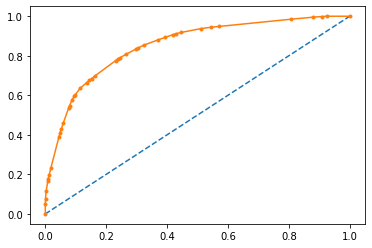

In [48]:
print('AUC: %.3f' % DT_train_auc)
fpr_dt_train, tpr_dt_train, thresholds_dt = roc_curve(y_train, probsDT_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt_train, tpr_dt_train, marker='.')
# show the plot
plt.show()

AUC: 0.778


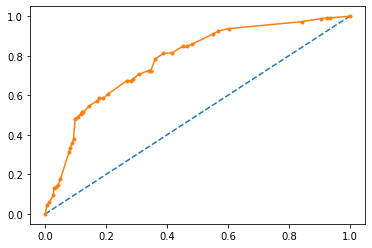

In [49]:
print('AUC: %.3f' % DT_test_auc)
fpr_dt_test, tpr_dt_test, thresholds_dt = roc_curve(y_test, probsDT_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_dt_test, tpr_dt_test, marker='.')
# show the plot
plt.show()



> **Random Forest**



In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
param_grid = {
    'max_depth': [6, 7, 8],
    'max_features': [4,5,6,7],
    'min_samples_leaf': [10, 15, 20],
    'min_samples_split': [30, 45, 60],
    'n_estimators': [51, 101]
}

rfc = RandomForestClassifier(oob_score=True, random_state=23)

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, cv = 3)

In [52]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=True, random_state=23,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [53]:
grid_search.best_params_

{'max_depth': 6,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 45,
 'n_estimators': 51}

In [54]:
best_grid_rfc = grid_search.best_estimator_

In [55]:
best_grid_rfc.oob_score_

0.7657342657342657

In [56]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=45,
                       min_weight_fraction_leaf=0.0, n_estimators=51,
                       n_jobs=None, oob_score=True, random_state=23, verbose=0,
                       warm_start=False)

In [57]:
ytrain_predict_rfc = best_grid_rfc.predict(X_train)
ytest_predict_rfc = best_grid_rfc.predict(X_test)

In [58]:
print(classification_report(y_train,ytrain_predict_rfc))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1343
           1       0.73      0.62      0.67       659

    accuracy                           0.80      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.79      0.80      0.80      2002



In [59]:
print(confusion_matrix(y_train,ytrain_predict_rfc))

[[1193  150]
 [ 251  408]]


In [60]:
rfc_train_acc = best_grid_rfc.score(X_train, y_train)
probs_rfc = best_grid_rfc.predict_proba(X_train)[:, 1]
rfc_train_auc = roc_auc_score(y_train, probs_rfc)
print('Accuracy', rfc_train_acc)
print('AUC: %.3f' % rfc_train_auc)
rfc_metrics=classification_report(y_train,ytrain_predict_rfc,output_dict=True)
data_rfc=pd.DataFrame(rfc_metrics).transpose()
rfc_train_precision=round(data_rfc.loc["1"][0],2)
rfc_train_recall=round(data_rfc.loc["1"][1],2)
rfc_train_f1=round(data_rfc.loc["1"][2],2)
print ('rfc_train_precision ',rfc_train_precision)
print ('rfc_train_recall ',rfc_train_recall)
print ('rfc_train_f1 ',rfc_train_f1)

Accuracy 0.7997002997002997
AUC: 0.850
rfc_train_precision  0.73
rfc_train_recall  0.62
rfc_train_f1  0.67


In [61]:
rfc_test_acc = best_grid_rfc.score(X_test, y_test)
probs_rfc = best_grid_rfc.predict_proba(X_test)[:, 1]
rfc_test_auc = roc_auc_score(y_test, probs_rfc)
print('Accuracy', rfc_test_acc)
print('AUC: %.3f' % rfc_test_auc)
rfc_metrics=classification_report(y_test,ytest_predict_rfc,output_dict=True)
data_rfc=pd.DataFrame(rfc_metrics).transpose()
rfc_test_precision=round(data_rfc.loc["1"][0],2)
rfc_test_recall=round(data_rfc.loc["1"][1],2)
rfc_test_f1=round(data_rfc.loc["1"][2],2)
print ('rfc_test_precision ',rfc_test_precision)
print ('rfc_test_recall ',rfc_test_recall)
print ('rfc_test_f1 ',rfc_test_f1)

Accuracy 0.7785547785547785
AUC: 0.813
rfc_test_precision  0.64
rfc_test_recall  0.57
rfc_test_f1  0.6


In [62]:
print(classification_report(y_test,ytest_predict_rfc))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       603
           1       0.64      0.57      0.60       255

    accuracy                           0.78       858
   macro avg       0.74      0.72      0.73       858
weighted avg       0.77      0.78      0.77       858



In [63]:
print(confusion_matrix(y_test,ytest_predict_rfc))

[[523  80]
 [110 145]]


In [64]:
rfc_metrics=classification_report(y_test,ytest_predict_rfc,output_dict=True)
data=pd.DataFrame(rfc_metrics).transpose()
RFC_precision=round(data.loc["1"][0],2)
RFC_recall=round(data.loc["1"][1],2)
RFC_f1=round(data.loc["1"][2],2)
print ('RFC_precision ',RFC_precision)
print ('RFC_recall ',RFC_recall)
print ('RFC_f1 ',RFC_f1)

RFC_precision  0.64
RFC_recall  0.57
RFC_f1  0.6


AUC: 0.850


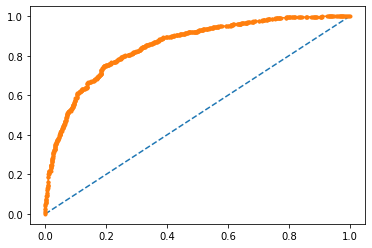

In [65]:
# predict probabilities
RFprobs = best_grid_rfc.predict_proba(X_train)
# keep probabilities for the positive outcome only
RFprobs = RFprobs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
RFauc = roc_auc_score(y_train, RFprobs)
print('AUC: %.3f' % RFauc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_rfc_train, tpr_rfc_train, thresholds = roc_curve(y_train, RFprobs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rfc_train, tpr_rfc_train, marker='.')
# show the plot
plt.show()

AUC: 0.813


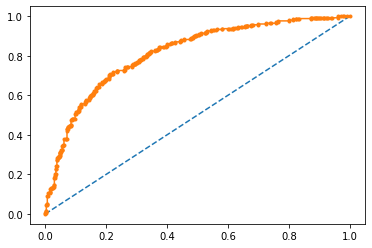

In [66]:
# predict probabilities
RFprobs = best_grid_rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
RFprobs = RFprobs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
RFauc = roc_auc_score(y_test, RFprobs)
print('AUC: %.3f' % RFauc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_rfc_test, tpr_rfc_test, thresholds = roc_curve(y_test, RFprobs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_rfc_test, tpr_rfc_test, marker='.')
# show the plot
plt.show()

**Neural Network**

In [67]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [68]:
from sklearn.neural_network import MLPClassifier

In [69]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.01,0.001],
    'max_iter' : [10000]
}

ann = MLPClassifier(random_state=1, verbose=True)

grid_search = GridSearchCV(estimator = ann, param_grid = param_grid, cv = 3)

In [70]:

cart_metrics=classification_report(y_train,ytrain_predict_dt,output_dict=True)
data=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(data.loc["1"][0],2)
cart_train_recall=round(data.loc["1"][1],2)
cart_train_f1=round(data.loc["1"][2],2)
grid_search.fit(X_trains, y_train)

Iteration 1, loss = 0.79964022
Iteration 2, loss = 0.72727240
Iteration 3, loss = 0.66880964
Iteration 4, loss = 0.64114820
Iteration 5, loss = 0.63451073
Iteration 6, loss = 0.63367074
Iteration 7, loss = 0.63379348
Iteration 8, loss = 0.63381568
Iteration 9, loss = 0.63356639
Iteration 10, loss = 0.63337428
Iteration 11, loss = 0.63329535
Iteration 12, loss = 0.63321402
Iteration 13, loss = 0.63323799
Iteration 14, loss = 0.63320480
Iteration 15, loss = 0.63325546
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.79941607
Iteration 2, loss = 0.72719564
Iteration 3, loss = 0.67018087
Iteration 4, loss = 0.64143857
Iteration 5, loss = 0.63396596
Iteration 6, loss = 0.63339651
Iteration 7, loss = 0.63379286
Iteration 8, loss = 0.63379843
Iteration 9, loss = 0.63357590
Iteration 10, loss = 0.63332557
Iteration 11, loss = 0.63325441
Iteration 12, loss = 0.63320782
Iteration 13, loss = 0.63321797
Iteration 14, loss = 0.63326175


Iteration 27, loss = 0.51314462
Iteration 28, loss = 0.51114367
Iteration 29, loss = 0.51147956
Iteration 30, loss = 0.51035971
Iteration 31, loss = 0.51057435
Iteration 32, loss = 0.50954772
Iteration 33, loss = 0.50922941
Iteration 34, loss = 0.50897674
Iteration 35, loss = 0.50860634
Iteration 36, loss = 0.50863859
Iteration 37, loss = 0.50777128
Iteration 38, loss = 0.50819993
Iteration 39, loss = 0.50760374
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.68528434
Iteration 2, loss = 0.67472651
Iteration 3, loss = 0.66114411
Iteration 4, loss = 0.64757676
Iteration 5, loss = 0.63581129
Iteration 6, loss = 0.62526102
Iteration 7, loss = 0.61617666
Iteration 8, loss = 0.60885381
Iteration 9, loss = 0.60250731
Iteration 10, loss = 0.59703583
Iteration 11, loss = 0.59196939
Iteration 12, loss = 0.58763068
Iteration 13, loss = 0.58375995
Iteration 14, loss = 0.58008061
Iteration 15, loss = 0.57692730
Iteration 16, loss = 0.

Iteration 4, loss = 0.51273604
Iteration 5, loss = 0.50665359
Iteration 6, loss = 0.50221840
Iteration 7, loss = 0.49831239
Iteration 8, loss = 0.49802131
Iteration 9, loss = 0.49113422
Iteration 10, loss = 0.48878168
Iteration 11, loss = 0.48705333
Iteration 12, loss = 0.48307599
Iteration 13, loss = 0.47964679
Iteration 14, loss = 0.47876739
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.62910102
Iteration 2, loss = 0.54670807
Iteration 3, loss = 0.52687918
Iteration 4, loss = 0.52059320
Iteration 5, loss = 0.51459248
Iteration 6, loss = 0.51131079
Iteration 7, loss = 0.50845860
Iteration 8, loss = 0.50663350
Iteration 9, loss = 0.50322945
Iteration 10, loss = 0.50101533
Iteration 11, loss = 0.49943674
Iteration 12, loss = 0.49724966
Iteration 13, loss = 0.49451478
Iteration 14, loss = 0.49263281
Iteration 15, loss = 0.49098802
Iteration 16, loss = 0.48924894
Iteration 17, loss = 0.48676496
Iteration 18, loss = 0.487152

Iteration 99, loss = 0.37395905
Iteration 100, loss = 0.36979741
Iteration 101, loss = 0.37316770
Iteration 102, loss = 0.37032427
Iteration 103, loss = 0.37831330
Iteration 104, loss = 0.37896543
Iteration 105, loss = 0.37026704
Iteration 106, loss = 0.37742201
Iteration 107, loss = 0.37319654
Iteration 108, loss = 0.36864098
Iteration 109, loss = 0.36431688
Iteration 110, loss = 0.36703398
Iteration 111, loss = 0.36611322
Iteration 112, loss = 0.36589610
Iteration 113, loss = 0.36379781
Iteration 114, loss = 0.36403276
Iteration 115, loss = 0.36726260
Iteration 116, loss = 0.36724671
Iteration 117, loss = 0.36557755
Iteration 118, loss = 0.36882821
Iteration 119, loss = 0.36128168
Iteration 120, loss = 0.36990125
Iteration 121, loss = 0.36140015
Iteration 122, loss = 0.36733442
Iteration 123, loss = 0.36580400
Iteration 124, loss = 0.35760739
Iteration 125, loss = 0.36312109
Iteration 126, loss = 0.36054984
Iteration 127, loss = 0.35559471
Iteration 128, loss = 0.36048993
Iteration 1

Iteration 157, loss = 0.35172524
Iteration 158, loss = 0.33513674
Iteration 159, loss = 0.33818749
Iteration 160, loss = 0.33594506
Iteration 161, loss = 0.34612544
Iteration 162, loss = 0.33599932
Iteration 163, loss = 0.35120594
Iteration 164, loss = 0.35553614
Iteration 165, loss = 0.34961289
Iteration 166, loss = 0.34462953
Iteration 167, loss = 0.33421913
Iteration 168, loss = 0.33679245
Iteration 169, loss = 0.33167391
Iteration 170, loss = 0.33178065
Iteration 171, loss = 0.33027482
Iteration 172, loss = 0.32810481
Iteration 173, loss = 0.32739616
Iteration 174, loss = 0.32560877
Iteration 175, loss = 0.32869412
Iteration 176, loss = 0.32367720
Iteration 177, loss = 0.32784508
Iteration 178, loss = 0.32526508
Iteration 179, loss = 0.34179628
Iteration 180, loss = 0.33990767
Iteration 181, loss = 0.34154713
Iteration 182, loss = 0.34152041
Iteration 183, loss = 0.33873967
Iteration 184, loss = 0.33297040
Iteration 185, loss = 0.33069388
Iteration 186, loss = 0.32313182
Iteration 

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=True,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', 'relu'],
         

In [71]:
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [72]:
best_grid_ann = grid_search.best_estimator_

In [73]:
ytrain_predict_ann = best_grid_ann.predict(X_trains)
ytest_predict_ann = best_grid_ann.predict(X_tests)

In [74]:
print(classification_report(y_train,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1343
           1       0.67      0.60      0.63       659

    accuracy                           0.77      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.76      0.77      0.77      2002



In [75]:
print(confusion_matrix(y_train,ytrain_predict_ann))

[[1147  196]
 [ 265  394]]


In [76]:
ann_train_acc = best_grid_ann.score(X_trains, y_train)
probs_ann = best_grid_ann.predict_proba(X_trains)[:, 1]
ann_train_auc = roc_auc_score(y_train, probs_ann)
print('Accuracy', ann_train_acc)
print('AUC: %.3f' % ann_train_auc)
ann_metrics=classification_report(y_train,ytrain_predict_ann,output_dict=True)
data_ann=pd.DataFrame(ann_metrics).transpose()
ann_train_precision=round(data_ann.loc["1"][0],2)
ann_train_recall=round(data_ann.loc["1"][1],2)
ann_train_f1=round(data_ann.loc["1"][2],2)
print ('ann_train_precision ',ann_train_precision)
print ('ann_train_recall ',ann_train_recall)
print ('ann_train_f1 ',ann_train_f1)

Accuracy 0.7697302697302697
AUC: 0.808
ann_train_precision  0.67
ann_train_recall  0.6
ann_train_f1  0.63


In [77]:
ann_test_acc = best_grid_ann.score(X_tests, y_test)
probs_ann = best_grid_ann.predict_proba(X_tests)[:, 1]
ann_test_auc = roc_auc_score(y_test, probs_ann)
print('Accuracy', ann_test_acc)
print('AUC: %.3f' % ann_test_auc)
ann_metrics=classification_report(y_test,ytest_predict_ann,output_dict=True)
data_ann=pd.DataFrame(ann_metrics).transpose()
ann_test_precision=round(data_ann.loc["1"][0],2)
ann_test_recall=round(data_ann.loc["1"][1],2)
ann_test_f1=round(data_ann.loc["1"][2],2)
print ('ann_test_precision ',ann_test_precision)
print ('ann_test_recall ',ann_test_recall)
print ('ann_test_f1 ',ann_test_f1)

Accuracy 0.7610722610722611
AUC: 0.795
ann_test_precision  0.61
ann_test_recall  0.55
ann_test_f1  0.58


In [78]:
print(classification_report(y_test,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       603
           1       0.61      0.55      0.58       255

    accuracy                           0.76       858
   macro avg       0.71      0.70      0.70       858
weighted avg       0.75      0.76      0.76       858



In [79]:
print(confusion_matrix(y_test,ytest_predict_ann))

[[514  89]
 [116 139]]


In [80]:
ANN_metrics=classification_report(y_test,ytest_predict_ann,output_dict=True)
data=pd.DataFrame(ANN_metrics).transpose()
ANN_precision=round(data.loc["1"][0],2)
ANN_recall=round(data.loc["1"][1],2)
ANN_f1=round(data.loc["1"][2],2)
print ('ANN_precision ',ANN_precision)
print ('ANN_recall ',ANN_recall)
print ('ANN_f1 ',ANN_f1)

ANN_precision  0.61
ANN_recall  0.55
ANN_f1  0.58


AUC: 0.816


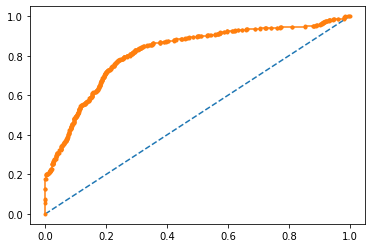

In [81]:
# predict probabilities
RFprobs = best_grid_ann.predict_proba(X_train)
# keep probabilities for the positive outcome only
RFprobs = RFprobs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
RFauc = roc_auc_score(ytrain_predict_ann, RFprobs)
print('AUC: %.3f' % RFauc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_ann_train, tpr_ann_train, thresholds = roc_curve(ytrain_predict_ann, RFprobs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_ann_train, tpr_ann_train, marker='.')
# show the plot
plt.show()

AUC: 0.837


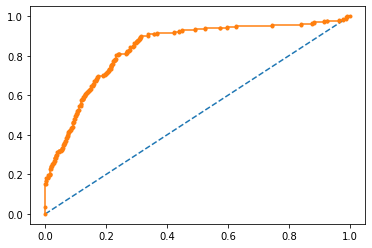

In [82]:
# predict probabilities
RFprobs = best_grid_ann.predict_proba(X_test)
# keep probabilities for the positive outcome only
RFprobs = RFprobs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
RFauc = roc_auc_score(ytest_predict_ann, RFprobs)
print('AUC: %.3f' % RFauc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr_ann_test, tpr_ann_test, thresholds = roc_curve(ytest_predict_ann, RFprobs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_ann_test, tpr_ann_test, marker='.')
# show the plot
plt.show()

**Comparing Model**

In [83]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,DT_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,DT_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
        'Random Forest Train':[rfc_train_acc,rfc_train_auc,rfc_train_recall,rfc_train_precision,rfc_train_f1],
        'Random Forest Test':[rfc_test_acc,rfc_test_auc,rfc_test_recall,rfc_test_precision,rfc_test_f1],
        'Neural Network Train':[ann_train_acc,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[ann_test_acc,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},
        index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.77,0.80,0.78,0.77,0.76
AUC,0.85,0.78,0.85,0.81,0.81,0.80
Recall,0.60,0.51,0.62,0.57,0.60,0.55
Precision,0.75,0.64,0.73,0.64,0.67,0.61
F1 Score,0.67,0.57,0.67,0.60,0.63,0.58


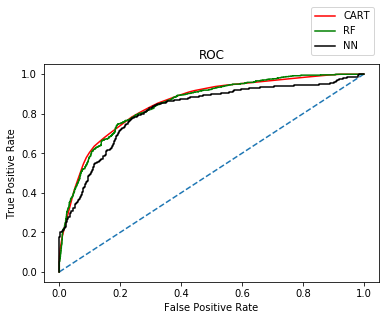

In [84]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_dt_train, tpr_dt_train,color='red',label="CART")
plt.plot(fpr_rfc_train,tpr_rfc_train,color='green',label="RF")
plt.plot(fpr_ann_train,tpr_ann_train,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()

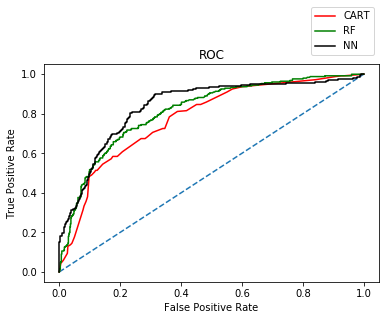

In [85]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_dt_test, tpr_dt_test,color='red',label="CART")
plt.plot(fpr_rfc_test,tpr_rfc_test,color='green',label="RF")
plt.plot(fpr_ann_test,tpr_ann_test,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')
plt.show()